# Spatiotemporal Data Preprocessing

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import glob
import os

from datetime import datetime

In [27]:
all_files = glob.glob(os.path.join('./data/', '*.csv'))

dtypes = {'user_type':str, 'bike_share_for_all_trip':str, 'rental_access_method':str}

raw_data = pd.concat((pd.read_csv(f, dtype=dtypes).iloc[::-1].reset_index(drop=True) for f in all_files), ignore_index=True)

display(raw_data)

duration_sec                start_time                  end_time  \
0                 150  2018-12-01 00:03:05.7420  2018-12-01 00:05:36.0260   
1                 292  2018-12-01 00:03:06.5490  2018-12-01 00:07:59.0800   
2                 260  2018-12-01 00:05:27.6150  2018-12-01 00:09:47.9560   
3                 841  2018-12-01 00:02:48.7260  2018-12-01 00:16:49.7660   
4                 473  2018-12-01 00:11:54.8110  2018-12-01 00:19:48.5470   
...               ...                       ...                       ...   
2916783         83380  2018-07-31 09:22:29.1000  2018-08-01 08:32:09.2700   
2916784         51522  2018-07-31 18:54:23.7210  2018-08-01 09:13:06.6610   
2916785         43864  2018-07-31 21:03:26.7030  2018-08-01 09:14:30.8340   
2916786         60232  2018-07-31 17:24:26.2350  2018-08-01 10:08:18.7520   
2916787         59989  2018-07-31 18:20:32.7230  2018-08-01 11:00:22.1890   

         start_station_id            start_station_name  \
0                   107.0         17th St at Dolores St   
1                    93.0  4th St at Mission Bay Blvd S   
2                   245.0        Downtown Berkeley BART   
3                    10.0    Washington St at Kearny St   
4                   345.0         Hubbell St at 16th St   
...                   ...                           ...   
2916783             213.0         32nd St at Adeline St   
2916784             114.0    Rhode Island St at 17th St   
2916785               NaN                           NaN   
2916786              77.0          11th St at Natoma St   
2916787             197.0   El Embarcadero at Grand Ave   

         start_station_latitude  start_station_longitude  end_station_id  \
0                     37.763015              -122.426497           119.0   
1                     37.770407              -122.391198           126.0   
2                     37.870139              -122.268422           255.0   
3                     37.795393              -122.404770            58.0   
4                     37.766474              -122.398295            81.0   
...                         ...                      ...             ...   
2916783               37.823847              -122.281193           198.0   
2916784               37.764478              -122.402570           345.0   
2916785               37.410000              -121.940000             NaN   
2916786               37.773507              -122.416040           356.0   
2916787               37.808848              -122.249680           181.0   

                    end_station_name  end_station_latitude  \
0                  18th St at Noe St             37.761047   
1                        Esprit Park             37.761634   
2        Virginia St at Shattuck Ave             37.876573   
3               Market St at 10th St             37.776619   
4                 Berry St at 4th St             37.775880   
...                              ...                   ...   
2916783                    Snow Park             37.807813   
2916784        Hubbell St at 16th St             37.766474   
2916785                          NaN             37.410000   
2916786  Valencia St at Clinton Park             37.769188   
2916787      Grand Ave at Webster St             37.811377   

         end_station_longitude  bike_id   user_type bike_share_for_all_trip  
0                  -122.432642     4319  Subscriber                      No  
1                  -122.390648      545  Subscriber                      No  
2                  -122.269528     2243  Subscriber                      No  
3                  -122.417385     2034  Subscriber                      No  
4                  -122.393170     3035  Subscriber                      No  
...                        ...      ...         ...                     ...  
2916783            -122.264496     1336  Subscriber                      No  
2916784            -122.398295     1043  Subscriber                      No  
2916785        

In [28]:
# Drop useless stuff
start_trip_data = raw_data.drop(
    columns = [
        'duration_sec','end_time',
        'start_station_name',
        'end_station_id','end_station_name',
        'end_station_latitude','end_station_longitude',
        'bike_id', 'user_type', 'bike_share_for_all_trip'
    ]
)

# Keep only the date
start_trip_data['date'] = pd.to_datetime(raw_data['start_time'], format='%Y-%m-%d %H').apply(lambda timestamp: timestamp.date())
start_trip_data.drop(columns = ['start_time'], inplace = True)

# Drop unknown stations
start_trip_data.dropna(inplace = True)

display(start_trip_data)
# 153037

start_station_id  start_station_latitude  start_station_longitude  \
0                   107.0               37.763015              -122.426497   
1                    93.0               37.770407              -122.391198   
2                   245.0               37.870139              -122.268422   
3                    10.0               37.795393              -122.404770   
4                   345.0               37.766474              -122.398295   
...                   ...                     ...                      ...   
2916782             139.0               37.751017              -122.411901   
2916783             213.0               37.823847              -122.281193   
2916784             114.0               37.764478              -122.402570   
2916786              77.0               37.773507              -122.416040   
2916787             197.0               37.808848              -122.249680   

               date  
0        2018-12-01  
1        2018-12-01  
2        2018-12-01  
3        2018-12-01  
4        2018-12-01  
...             ...  
2916782  2018-07-31  
2916783  2018-07-31  
2916784  2018-07-31  
2916786  2018-07-31  
2916787  2018-07-31  

[2904272 rows x 4 columns]

In [29]:
# Group by start station location and date
groups = start_trip_data.groupby(['start_station_latitude','start_station_longitude','start_station_id','date'])

# Count the number of trips in each group
start_trip_count_data = groups.size().reset_index(name = 'trip_count')

# Sort by date
start_trip_count_data.sort_values(by = 'date', inplace = True)

# Reset index
start_trip_count_data.reset_index(drop = True, inplace = True)

display(start_trip_count_data)

start_station_latitude  start_station_longitude  start_station_id  \
0                    37.871719              -122.273068             238.0   
1                    37.783757              -122.222603             227.0   
2                    37.757369              -122.392057             130.0   
3                    37.337246              -121.883074             280.0   
4                    37.775880              -122.393170              81.0   
...                        ...                      ...               ...   
150270               37.773793              -122.421239              75.0   
150271               37.773717              -122.411647              78.0   
150272               37.773507              -122.416040              77.0   
150273               37.777547              -122.433274              54.0   
150274               37.880222              -122.269592             254.0   

              date  trip_count  
0       2018-01-01           3  
1       2018-01-01           1  
2       2018-01-01           9  
3       2018-01-01           1  
4       2018-01-01          21  
...            ...         ...  
150270  2019-05-31          25  
150271  2019-05-31          27  
150272  2019-05-31          50  
150273  2019-05-31          25  
150274  2019-05-31          14  

[150275 rows x 5 columns]

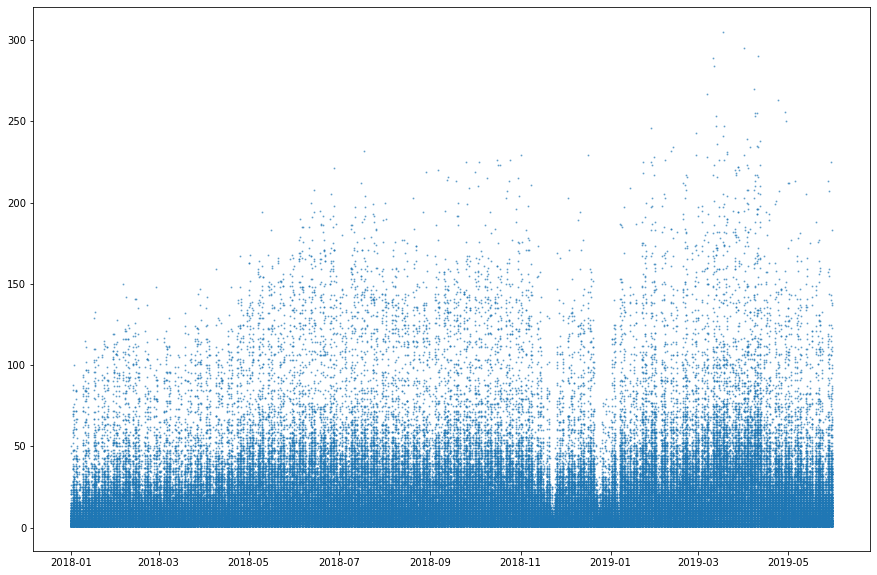

In [5]:
from scipy.stats import gaussian_kde

x = start_trip_count_data['date']
y = start_trip_count_data['trip_count']

fig, ax = plt.subplots(figsize=(15,10))
ax.scatter(x, y, s=1, alpha=0.5)
plt.show()

In [38]:
# import plotly.express as px
# fig = px.scatter(x=x, y=y, opacity=0.5)
# fig.update_traces(marker=dict(size=3))
# fig.show()

In [30]:
start_trip_count_data.describe()

start_station_latitude  start_station_longitude  start_station_id  \
count           150275.000000            150275.000000     150275.000000   
mean                37.737649              -122.284609        178.106678   
std                  0.188509                 0.357956        104.288818   
min                  0.000000              -122.473658          3.000000   
25%                 37.763708              -122.410345         90.000000   
50%                 37.783521              -122.290231        176.000000   
75%                 37.817827              -122.261578        263.000000   
max                 37.880222                 0.000000        427.000000   

          trip_count  
count  150275.000000  
mean       19.326382  
std        24.129939  
min         1.000000  
25%         5.000000  
50%        12.000000  
75%        24.000000  
max       305.000000

In [31]:
start_trip_count_data = start_trip_count_data[
    (start_trip_count_data['start_station_longitude'] != 0) 
    & (start_trip_count_data['start_station_latitude'] != 0)
    & (start_trip_count_data['start_station_latitude'] < 40)
] # Remove outliers

In [32]:
start_trip_count_data.describe()

start_station_latitude  start_station_longitude  start_station_id  \
count           150274.000000            150274.000000     150274.000000   
mean                37.737900              -122.285423        178.105068   
std                  0.161427                 0.169186        104.287298   
min                 37.263310              -122.473658          3.000000   
25%                 37.763708              -122.410345         90.000000   
50%                 37.783521              -122.290231        176.000000   
75%                 37.817827              -122.261578        263.000000   
max                 37.880222              -121.833332        427.000000   

          trip_count  
count  150274.000000  
mean       19.326504  
std        24.129973  
min         1.000000  
25%         5.000000  
50%        12.000000  
75%        24.000000  
max       305.000000

## Heatmap

In [28]:
import folium
from folium.plugins import HeatMapWithTime

In [29]:
X = []

for date in start_trip_count_data['date'].unique(): # Already sorted
    df_x = start_trip_count_data[start_trip_count_data['date'] == date].drop(columns =['date'])
    df_x['trip_count'] /= df_x['trip_count'].quantile(0.9) # Adjust for outliers
    x = df_x.values.tolist()
    X.append(x)
    
lat_center = start_trip_count_data['start_station_latitude'].mean()
long_center = start_trip_count_data['start_station_longitude'].mean()

base_map = folium.Map(location=[lat_center, long_center], control_scale=True, tiles='openstreetmap')

heatmap = HeatMapWithTime(X)

heatmap.add_to(base_map)

base_map.save(f'./heatmap.html')

## Feature Engineering

In [33]:
display(start_trip_count_data)

start_station_latitude  start_station_longitude  start_station_id  \
0                    37.871719              -122.273068             238.0   
1                    37.783757              -122.222603             227.0   
2                    37.757369              -122.392057             130.0   
3                    37.337246              -121.883074             280.0   
4                    37.775880              -122.393170              81.0   
...                        ...                      ...               ...   
150270               37.773793              -122.421239              75.0   
150271               37.773717              -122.411647              78.0   
150272               37.773507              -122.416040              77.0   
150273               37.777547              -122.433274              54.0   
150274               37.880222              -122.269592             254.0   

              date  trip_count  
0       2018-01-01           3  
1       2018-01-01           1  
2       2018-01-01           9  
3       2018-01-01           1  
4       2018-01-01          21  
...            ...         ...  
150270  2019-05-31          25  
150271  2019-05-31          27  
150272  2019-05-31          50  
150273  2019-05-31          25  
150274  2019-05-31          14  

[150274 rows x 5 columns]

### Station ID One-Hot Encoding

In [34]:
one_hot = pd.get_dummies(start_trip_count_data['start_station_id'].astype(int))
start_trip_count_data.drop('start_station_id', axis = 1, inplace = True)
start_trip_count_data = start_trip_count_data.join(one_hot)
display(start_trip_count_data)

start_station_latitude  start_station_longitude        date  \
0                    37.871719              -122.273068  2018-01-01   
1                    37.783757              -122.222603  2018-01-01   
2                    37.757369              -122.392057  2018-01-01   
3                    37.337246              -121.883074  2018-01-01   
4                    37.775880              -122.393170  2018-01-01   
...                        ...                      ...         ...   
150270               37.773793              -122.421239  2019-05-31   
150271               37.773717              -122.411647  2019-05-31   
150272               37.773507              -122.416040  2019-05-31   
150273               37.777547              -122.433274  2019-05-31   
150274               37.880222              -122.269592  2019-05-31   

        trip_count  3  4  5  6  7  8  ...  417  418  419  421  422  423  424  \
0                3  0  0  0  0  0  0  ...    0    0    0    0    0    0    0   
1                1  0  0  0  0  0  0  ...    0    0    0    0    0    0    0   
2                9  0  0  0  0  0  0  ...    0    0    0    0    0    0    0   
3                1  0  0  0  0  0  0  ...    0    0    0    0    0    0    0   
4               21  0  0  0  0  0  0  ...    0    0    0    0    0    0    0   
...            ... .. .. .. .. .. ..  ...  ...  ...  ...  ...  ...  ...  ...   
150270          25  0  0  0  0  0  0  ...    0    0    0    0    0    0    0   
150271          27  0  0  0  0  0  0  ...    0    0    0    0    0    0    0   
150272          50  0  0  0  0  0  0  ...    0    0    0    0    0    0    0   
150273          25  0  0  0  0  0  0  ...    0    0    0    0    0    0    0   
150274          14  0  0  0  0  0  0  ...    0    0    0    0    0    0    0   

        425  426  427  
0         0    0    0  
1         0    0    0  
2         0    0    0  
3         0    0    0  
4         0    0    0  
...     ...  ...  ...  
150270    0    0    0  
150271    0    0    0  
150272    0    0    0  
150273    0    0    0  
150274    0    0    0  

[150274 rows x 382 columns]

### Clustering

In [35]:
city_locs = [
    np.array([37.8395, -122.2892]), # San Francisco
    np.array([37.7749, -122.4194]), # East Bay 
    np.array([37.3382, -121.8863]), # San Jose
]

def which_city(row):

    loc = np.array([
        row['start_station_latitude'],
        row['start_station_longitude']
    ])
    
    dists = [np.linalg.norm(loc - city_loc) for city_loc in city_locs]
    
    min_dist = min(dists)
    
    return  [1 if dist == min_dist else 0 for dist in dists]

start_trip_count_data['in_SF'], start_trip_count_data['in_EB'], start_trip_count_data['in_SJ'] = zip(*start_trip_count_data.apply(which_city, axis=1))


In [36]:
display(start_trip_count_data)

start_station_latitude  start_station_longitude        date  \
0                    37.871719              -122.273068  2018-01-01   
1                    37.783757              -122.222603  2018-01-01   
2                    37.757369              -122.392057  2018-01-01   
3                    37.337246              -121.883074  2018-01-01   
4                    37.775880              -122.393170  2018-01-01   
...                        ...                      ...         ...   
150270               37.773793              -122.421239  2019-05-31   
150271               37.773717              -122.411647  2019-05-31   
150272               37.773507              -122.416040  2019-05-31   
150273               37.777547              -122.433274  2019-05-31   
150274               37.880222              -122.269592  2019-05-31   

        trip_count  3  4  5  6  7  8  ...  421  422  423  424  425  426  427  \
0                3  0  0  0  0  0  0  ...    0    0    0    0    0    0    0   
1                1  0  0  0  0  0  0  ...    0    0    0    0    0    0    0   
2                9  0  0  0  0  0  0  ...    0    0    0    0    0    0    0   
3                1  0  0  0  0  0  0  ...    0    0    0    0    0    0    0   
4               21  0  0  0  0  0  0  ...    0    0    0    0    0    0    0   
...            ... .. .. .. .. .. ..  ...  ...  ...  ...  ...  ...  ...  ...   
150270          25  0  0  0  0  0  0  ...    0    0    0    0    0    0    0   
150271          27  0  0  0  0  0  0  ...    0    0    0    0    0    0    0   
150272          50  0  0  0  0  0  0  ...    0    0    0    0    0    0    0   
150273          25  0  0  0  0  0  0  ...    0    0    0    0    0    0    0   
150274          14  0  0  0  0  0  0  ...    0    0    0    0    0    0    0   

        in_SF  in_EB  in_SJ  
0           1      0      0  
1           1      0      0  
2           0      1      0  
3           0      0      1  
4           0      1      0  
...       ...    ...    ...  
150270      0      1      0  
150271      0      1      0  
150272      0      1      0  
150273      0      1      0  
150274      1      0      0  

[150274 rows x 385 columns]

### Weather Data

In [37]:
from meteostat import Point, Stations, Daily

In [38]:
lat_center = start_trip_count_data['start_station_latitude'].mean()
long_center = start_trip_count_data['start_station_longitude'].mean()

stations = Stations()
stations = stations.nearby(lat_center , long_center)
nearest_stations = stations.fetch(15)

display(nearest_stations)

name country region    wmo  \
id                                                                         
72493         Metro Oakland International  Airport      US     CA  72493   
74506                    Alameda Naval Air Station      US     CA  74506   
72494                        San Francisco Airport      US     CA  72494   
72585                       Hayward / Russell City      US     CA  72585   
KSQL0   San Carlos / Silver Penny Mobile Home Park      US     CA   <NA>   
KHAF0  Half Moon Bay / El Granada Mobile Home Park      US     CA   <NA>   
KPAO0          Palo Alto / Runnymeade (Historical)      US     CA   <NA>   
74509                                Moffett Field      US     CA  74509   
KLVK0                  Livermore / East Pleasanton      US     CA   <NA>   
KDVO0                             Novato / Burdell      US     CA   <NA>   
KSJC0       San Jose / Santa Clara Trailer Village      US     CA   <NA>   
KAPC0                             Napa / Middleton      US     CA   <NA>   
KC830                                        Byron      US     CA   <NA>   
KRHV0                         San Jose / Alum Rock      US     CA   <NA>   
72495                              Farallon Island      US     CA  72495   

       icao  latitude  longitude  elevation             timezone hourly_start  \
id                                                                              
72493  KOAK   37.7167  -122.2333        2.0  America/Los_Angeles   1943-01-01   
74506  KNGZ   37.7833  -122.3167        4.0  America/Los_Angeles   1973-01-01   
72494  KSFO   37.6167  -122.3667        3.0  America/Los_Angeles   1973-01-01   
72585  KHWD   37.6589  -122.1218       16.0  America/Los_Angeles   2000-01-01   
KSQL0  KSQL   37.5119  -122.2495        2.0  America/Los_Angeles   2006-01-01   
KHAF0  KHAF   37.5134  -122.5012       20.0  America/Los_Angeles   2009-07-17   
KPAO0  KPAO   37.4611  -122.1151        2.0  America/Los_Angeles   2006-01-01   
74509  KNUQ   37.4333  -122.0500       10.0  America/Los_Angeles   1973-01-01   
KLVK0  KLVK   37.6934  -121.8204      122.0  America/Los_Angeles   2000-01-01   
KDVO0  KDVO   38.1436  -122.5561        1.0  America/Los_Angeles   2014-07-31   
KSJC0  KSJC   37.3627  -121.9291       19.0  America/Los_Angeles   1973-01-01   
KAPC0  KAPC   38.2132  -122.2807       11.0  America/Los_Angeles   2000-01-01   
KC830  KC83   37.8284  -121.6258       24.0  America/Los_Angeles   2020-01-14   
KRHV0  KRHV   37.3329  -121.8198       41.0  America/Los_Angeles   2006-01-01   
72495  K50Q   37.7000  -123.0000       12.0  America/Los_Angeles          NaT   

      hourly_end daily_start  daily_end monthly_start monthly_end  \
id                                                                  
72493 2021-12-16  1943-01-02 2021-12-13    1943-01-01  2021-01-01   
74506 1997-01-01  1945-03-01 1996-12-31    1945-01-01  1996-01-01   
72494 2021-12-16  1945-07-01 2021-12-13    1945-01-01  2021-01-01   
72585 2021-12-16  1998-09-19 2021-12-13    1998-01-01  2021-01-01   
KSQL0 2021-12-16  2019-03-04 2021-12-14    2020-01-01  2021-01-01   
KHAF0 2021-12-16  2009-07-18 2021-12-14    2011-01-01  2021-01-01   
KPAO0 2021-12-16         NaT        NaT           NaT         NaT   
74509 2021-12-16  1945-03-01 2021-12-14    1945-01-01  2021-01-01   
KLVK0 2021-12-16  2000-01-02 2021-12-14    2000-01-01  2021-01-01   
KDVO0 2021-12-16  2014-07-31 2021-12-14    2015-01-01  2021-01-01   
KSJC0 2021-12-16  1973-01-01 2021-12-13    2000-01-01  2021-01-01   
KAPC0 2021-12-16  2000-01-02 2021-12-13    2001-01-01  2021-01-01   
KC830 2021-12-16  2020-01-14 2021-12-14    2020-01-01  2021-01-01   
KRHV0 2021-12-16         NaT        NaT           NaT         NaT   
72495        NaT  1999-06-06 2021-12-07    1999-01-01  2021-01-01   

           distance  
id                   
72493   5154.680101  
74506   5748.466646  
72494  15257.421301  
72585  16864.336725  
KSQL0  25328.390730  
KHAF0  31373.234199  
KPAO0  34241.616834  
745

In [35]:
base_map = folium.Map(location=city_locs[0], control_scale=True, tiles='openstreetmap')

for i in range(len(nearest_stations)):
    folium.Marker(
      location = [nearest_stations.iloc[i]['latitude'], nearest_stations.iloc[i]['longitude']],
      popup = nearest_stations.iloc[i]['name'],
    ).add_to(base_map)

base_map.save(f'./weather_stations.html')

**Only two relevant weather stations:**

1. 72493 Metro Oakland International Airport
2. KSJC0 San Jose / Santa Clara Trailer Village (for San Jose)

In [39]:
start = start_trip_count_data['date'].iloc[0] # Already sorted
end = start_trip_count_data['date'].iloc[-1]  # Already sorted

start = datetime(start.year, start.month, start.day)
end = datetime(end.year, end.month, end.day)
print(f'start = {start}')
print(f'end = {end}')

sf_eb_weather_data = Daily('72493', start, end).fetch()
sj_weather_data = Daily('KSJC0', start, end).fetch()

start = 2018-01-01 00:00:00
end = 2019-05-31 00:00:00


In [40]:
sj_weather_data['prcp'] = sj_weather_data['prcp'].fillna(0.0)
sf_eb_weather_data['prcp'] = sf_eb_weather_data['prcp'].fillna(0.0)

sj_weather_data['snow'] = sj_weather_data['snow'].fillna(0.0)
sf_eb_weather_data['snow'] = sf_eb_weather_data['snow'].fillna(0.0)

sj_weather_data['pres'] = sj_weather_data['pres'].fillna(method="ffill")
sf_eb_weather_data['pres'] = sf_eb_weather_data['pres'].fillna(method="ffill")

cols_to_drop = ['wdir', 'wpgt', 'tsun']

clean_sj_weather_data = sj_weather_data.drop(columns=cols_to_drop)
clean_sf_eb_weather_data = sf_eb_weather_data.drop(columns=cols_to_drop)

display(clean_sj_weather_data)
display(clean_sf_eb_weather_data)

tavg  tmin  tmax  prcp  snow  wspd    pres
time                                                  
2018-01-01  11.9   6.7  17.2   0.0   0.0   2.1  1022.3
2018-01-02  12.4   8.9  16.1   0.0   0.0   2.8  1020.7
2018-01-03  12.2   8.3  15.6   0.0   0.0   5.8  1016.7
2018-01-04  16.1  12.2  20.6   0.0   0.0  14.5  1018.1
2018-01-05  15.5  12.2  18.9   0.0   0.0  10.8  1021.8
...          ...   ...   ...   ...   ...   ...     ...
2019-05-27  14.1  11.1  18.3   0.0   0.0  10.2  1017.7
2019-05-28  16.1  12.2  22.2   0.0   0.0  12.2  1016.2
2019-05-29  16.6  12.2  24.4   0.0   0.0  12.1  1012.4
2019-05-30  15.5  13.3  20.0   0.0   0.0  11.9  1013.2
2019-05-31  18.0  12.8  25.6   0.0   0.0   9.7  1011.9

[508 rows x 7 columns]

tavg  tmin  tmax  prcp  snow  wspd    pres
time                                                  
2018-01-01   9.3   3.9  13.9   0.0   0.0   4.3  1022.6
2018-01-02  10.6   6.7  14.4   0.0   0.0   5.0  1020.9
2018-01-03  10.9   4.4  13.3  15.7   0.0   6.1  1017.0
2018-01-04  13.7  11.1  17.8   0.5   0.0   8.6  1018.3
2018-01-05  13.7  11.1  15.6   8.4   0.0   9.0  1021.9
...          ...   ...   ...   ...   ...   ...     ...
2019-05-27  14.5  10.6  18.3   0.0   0.0  18.0  1017.9
2019-05-28  15.1  12.8  18.9   0.0   0.0  13.7  1016.6
2019-05-29  15.5  12.8  20.6   0.0   0.0  15.1  1012.8
2019-05-30  13.8  12.2  16.7   0.0   0.0  15.1  1012.4
2019-05-31  15.4  12.8  20.6   0.0   0.0  14.4  1012.5

[516 rows x 7 columns]

In [41]:
# WARNING: SLOW!

for i, row in start_trip_count_data.iterrows():
    
    date = row['date']
    
    if row['in_SF'] or row['in_EB']:
        try:
            weather = clean_sf_eb_weather_data.loc[f'{date.year}-{date.month}-{date.day}']
        except KeyError:
            continue
    elif row['in_SJ']:
        try:
            weather = clean_sj_weather_data.loc[f'{date.year}-{date.month}-{date.day}']
        except KeyError:
            continue
    else:
        continue
        
    for feature, value in weather.iteritems():
        start_trip_count_data.loc[i, feature] = value 

In [42]:
start_trip_count_data.dropna(inplace=True)

display(start_trip_count_data)

start_station_latitude  start_station_longitude        date  \
0                    37.871719              -122.273068  2018-01-01   
1                    37.783757              -122.222603  2018-01-01   
2                    37.757369              -122.392057  2018-01-01   
3                    37.337246              -121.883074  2018-01-01   
4                    37.775880              -122.393170  2018-01-01   
...                        ...                      ...         ...   
150270               37.773793              -122.421239  2019-05-31   
150271               37.773717              -122.411647  2019-05-31   
150272               37.773507              -122.416040  2019-05-31   
150273               37.777547              -122.433274  2019-05-31   
150274               37.880222              -122.269592  2019-05-31   

        trip_count  3  4  5  6  7  8  ...  in_SF  in_EB  in_SJ  tavg  tmin  \
0                3  0  0  0  0  0  0  ...      1      0      0   9.3   3.9   
1                1  0  0  0  0  0  0  ...      1      0      0   9.3   3.9   
2                9  0  0  0  0  0  0  ...      0      1      0   9.3   3.9   
3                1  0  0  0  0  0  0  ...      0      0      1  11.9   6.7   
4               21  0  0  0  0  0  0  ...      0      1      0   9.3   3.9   
...            ... .. .. .. .. .. ..  ...    ...    ...    ...   ...   ...   
150270          25  0  0  0  0  0  0  ...      0      1      0  15.4  12.8   
150271          27  0  0  0  0  0  0  ...      0      1      0  15.4  12.8   
150272          50  0  0  0  0  0  0  ...      0      1      0  15.4  12.8   
150273          25  0  0  0  0  0  0  ...      0      1      0  15.4  12.8   
150274          14  0  0  0  0  0  0  ...      1      0      0  15.4  12.8   

        tmax  prcp  snow  wspd    pres  
0       13.9   0.0   0.0   4.3  1022.6  
1       13.9   0.0   0.0   4.3  1022.6  
2       13.9   0.0   0.0   4.3  1022.6  
3       17.2   0.0   0.0   2.1  1022.3  
4       13.9   0.0   0.0   4.3  1022.6  
...      ...   ...   ...   ...     ...  
150270  20.6   0.0   0.0  14.4  1012.5  
150271  20.6   0.0   0.0  14.4  1012.5  
150272  20.6   0.0   0.0  14.4  1012.5  
150273  20.6   0.0   0.0  14.4  1012.5  
150274  20.6   0.0   0.0  14.4  1012.5  

[148845 rows x 392 columns]

### Time-Related Data

In [43]:
from pandas.tseries.holiday import USFederalHolidayCalendar
from pandas.tseries.offsets import CustomBusinessDay

In [44]:
us_bd = CustomBusinessDay(calendar=USFederalHolidayCalendar())

final_data = start_trip_count_data.copy()

final_data['date_hour'] = pd.to_datetime(final_data['date'], format='%Y-%m-%d')

final_data['is_business_day'] = (final_data['date_hour'].dt.date.isin(pd.date_range(start='2018-01-01',end='2020-01-01', freq=us_bd).date))*1

final_data['is_holiday'] = (final_data['date_hour'].dt.date.isin(USFederalHolidayCalendar().holidays(start='2018-01-01',end='2020-01-01').date))*1

day_name = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']
day_name = dict(enumerate(day_name))
month_name = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November','December']
month_name = dict(enumerate(month_name))
season_name = ['Spring', 'Summer', 'Fall']
season_name = dict(enumerate(season_name))

for i in range(3):
    final_data[season_name[i]] = (final_data['date_hour'].dt.month%12 // 3 + 1 == i)*1
    
for i in range(6):
    final_data[day_name[i]] = (final_data['date_hour'].dt.dayofweek == i)*1
    
for i in range(12):
    final_data[month_name[i]] = (final_data['date_hour'].dt.month == i+1)*1
    
final_data['days_passed'] = (final_data['date_hour'] - pd.to_datetime('2018-01-01')).dt.days

final_data.drop(columns=['date_hour', 'snow'], inplace=True)

In [45]:
final_data.to_csv('spatiotemporal_data_preprocessed.csv')